### Python Twitter Sentiment Analysis

In this project, we look towards identifying and categorising opinions regarding Cryptocurrency expressed in Tweets. This is achieved through the following steps: 

1. __Tokenisation__
    * Dividing a statement into individual words
    * Dividing a paragraph into individual statements <br/><br/>

2.	__Cleaning the data__
    * Remove any special words or any other word that doesn’t add any value to the analytics (stock words) <br/><br/>

3. __Classification__
    * Classify remaining words such as positive, negative and neutral
    * Positive: +1, Negative: -1, Neutral = 0 <br/><br/>

4.	__Apply supervised Algorithm for Classification__
    * Train your model with Bag of Words or Lexicons (dictionary of pre-classified set of words) and test it on the analysing statement
    * The higher the accuracy score, the better the classification! The dictionary (Bag of Words/Lexicons) tells us if the word is positive, negative or neutral <br/><br/>

5. __Calculation__ 
    * Calculate final sentiment score of the tweet
    * Generation of pie chart to show distribution of sentiment
    * Generation of word cloud
    
    
### How to use:
To use this sentiment analysis, you will need to create a Twitter Developer Account that gives you access to its API. This can be found at the following link: https://developer.twitter.com/en/docs.html. Once created, this will give you access to the API and you will require the consumer_key, consumer_secret, access_token, access_token_secret from your account to use this API. Following which, just execute the code in sequential order from the top to the bottom in order to use it!

Also, you are able to control for the query word and the number of tweets to be analyzed. Refer to the markdown below for more information!

In [48]:
import re 
import tweepy
from tweepy import OAuthHandler 
from textblob import TextBlob 
  
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'XXX'
        consumer_secret = 'XXX'
        access_token = 'XXX'
        access_token_secret = 'XXX'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object, method used to perform internal calculations
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret of the auth variable
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets, library to fetch tweets
            self.api = tweepy.API(self.auth) 
#             print("Authentication Success!") 
        except: 
            print("Error: Authentication Failed") 
            
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text for sentimental analysis
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets; fetched_tweets variables stores a list of tweets  
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one for loop which increments through every value from the list
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  
def main(queryword, count): 
    # creating object of TwitterClient Class: classification as positive, negative or neutral
    api = TwitterClient() 
    # for charts
    global pos, neg, neu, tweets, query
    # calling function to get tweets 
    query = queryword.lower()
    tweets = api.get_tweets(query, count = count) 

  
    # picking positive tweets from tweets through Lexicons 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    pos = (100*len(ptweets)/len(tweets))
    print("Positive tweets percentage: {} %".format(pos))
    
    # picking negative tweets from tweets through Lexicons
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    neg = (100*len(ntweets)/len(tweets))
    print("Negative tweets percentage: {} %".format(neg))
    
    neu = (100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))
    print("Neutral tweets percentage: {} %".format(neu))
  
    # printing first 5 positive tweets 
    print("\n\n Sample Positive tweets:") 
    for tweet in ptweets[:3]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\n Sample Negative tweets:") 
    for tweet in ntweets[:3]: 
        print(tweet['text']) 

### Execution of Code 

main(XX, YY) takes 2 arguments where XX would be the key word to be analyzed and YY would be the number of tweets to be analyzed. Note that XX has to be in string format while YY has to be integer format. The higher the number of tweets analyzed, the more time required by the code to run.

In [45]:
if __name__ == "__main__": 
    main('Cryptocurrency', 1000) 

Positive tweets percentage: 41 %
Negative tweets percentage: 5 %
Neutral tweets percentage: 52 %


 Sample Positive tweets:
RT @NischalShetty: Dear @arunjaitley

Facebook is developing its own cryptocurrency for whatsapp transfers.

It’s a matter of time before l…
RT @nup77JxCepzA7jI: #storyteller Bots are being used more and more in companies these days. Please read more in Cryptocurrency Magazine. V…
RT @droplistair: @TwinkleOfficia6 Project with great potential!#Airdrop #crypto Cool project.. Hopefully more investors will join this amaz…


 Sample Negative tweets:
Learn the secret arts of #Cryptocurrency -- https://t.co/0GlkAnh8oY -- #investinbitcoin #bitcointrade #bitcoinvalue… https://t.co/eLhoQTcOKO
Eat us, and there was little but the hard, unripe fruit left. #twitterbot #crypto #cryptocurrency #bitcoin #ethereum
RT @mintokens: According to a poll by Hilary Blinds, people complain about bad service every day for eight minutes. That’s 43800 min of com…


### Sentiment breakdown 

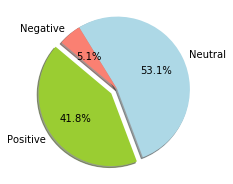

In [47]:
import matplotlib.pyplot as plt
labels = 'Positive', 'Neutral', 'Negative'
data = [pos, neu, neg]
colors = ['yellowgreen', 'lightblue', 'salmon']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(data, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.gcf().set_size_inches(3,3)
plt.axis('equal')
plt.show()

### Generation of wordcloud

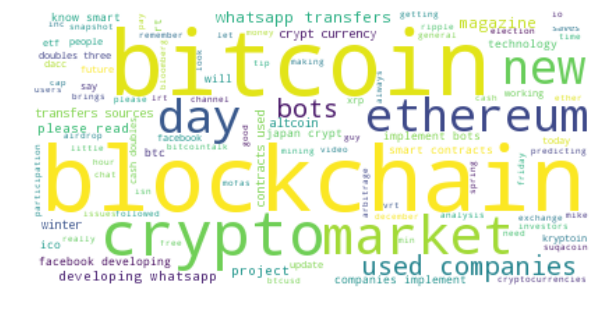

In [46]:
import matplotlib.pyplot as plt
# creation of string to pass into wordcloud 
word = ''
for tweet in tweets:
    ch = TwitterClient().clean_tweet(tweet['text'])
    word += ch.lower()

# replace the search query word itself, search query would not appear in word cloud
Nword = word
for w in query.split():
    Nword = Nword.replace(w, '')

# generation of wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white")\
            .generate(Nword)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.gcf().set_size_inches(10,10)
plt.axis("off")
plt.show()